In [379]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
%matplotlib inline


1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
8. contact: contact communication type (categorical: “cellular”, “telephone”)
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=‘no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
16. emp.var.rate: employment variation rate — (numeric)
17. cons.price.idx: consumer price index — (numeric)
18. cons.conf.idx: consumer confidence index — (numeric)
19. euribor3m: euribor 3 month rate — (numeric)
20. nr.employed: number of employees — (numeric)Predict variable (desired target)
y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

In [220]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 400)

In [221]:
df = pd.read_csv("https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv")

In [222]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [224]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


because of description above we ll drop duration

In [225]:
df.drop(columns="duration", inplace=True)

In [226]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [227]:
df.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp_var_rate       10
cons_price_idx     26
cons_conf_idx      26
euribor3m         316
nr_employed        11
y                   2
dtype: int64

In [228]:
df[df == "unknown"].count()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

## dropping unknown:

In [229]:
i = df[((df.job == 'unknown') | ( df.marital == "unknown") 
        | (df.education == 'unknown') | (df.housing == 'unknown') | (df.loan == "unknown"))].index

In [230]:
i

Int64Index([    1,    21,    26,    69,    70,    90,   101,   102,   148,
              157,
            ...
            41004, 41005, 41029, 41051, 41102, 41122, 41132, 41158, 41165,
            41166],
           dtype='int64', length=2943)

In [289]:
df2 = df.drop(i)

In [290]:
df2.index = range(len(df2))

In [291]:
df2.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
38240,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
38241,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
38242,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
38243,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
38244,25,student,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [232]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 20 columns):
age               38245 non-null int64
job               38245 non-null object
marital           38245 non-null object
education         38245 non-null object
default           38245 non-null object
housing           38245 non-null object
loan              38245 non-null object
contact           38245 non-null object
month             38245 non-null object
day_of_week       38245 non-null object
campaign          38245 non-null int64
pdays             38245 non-null int64
previous          38245 non-null int64
poutcome          38245 non-null object
emp_var_rate      38245 non-null float64
cons_price_idx    38245 non-null float64
cons_conf_idx     38245 non-null float64
euribor3m         38245 non-null float64
nr_employed       38245 non-null float64
y                 38245 non-null int64
dtypes: float64(5), int64(5), object(10)
memory usage: 6.1+ MB


In [292]:
df2[df2 == "unknown"].count()

age                  0
job                  0
marital              0
education            0
default           7757
housing              0
loan                 0
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

In [293]:
pd.value_counts(df2.default)

no         30485
unknown     7757
yes            3
Name: default, dtype: int64

In [294]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,28,management,single,university.degree,no,yes,no,cellular,jun,thu,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
2,39,services,married,high.school,no,no,no,cellular,apr,fri,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
3,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
4,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0


In [295]:
job = pd.get_dummies(df2.job,drop_first=True,prefix="job")
marital = pd.get_dummies(df2.marital,drop_first=True,prefix="marital")
education = pd.get_dummies(df2.education,drop_first=True,prefix="edu")
default = pd.get_dummies(df2.default,drop_first=True,prefix="defaul")
housing = pd.get_dummies(df2.housing,drop_first=True,prefix="hous")
loan = pd.get_dummies(df2.loan,drop_first=True,prefix="loan")
contact = pd.get_dummies(df2.contact,drop_first=True,prefix="contact")
month = pd.get_dummies(df2.month,drop_first=True,prefix="month")
day_of_week = pd.get_dummies(df2.day_of_week,drop_first=True,prefix="dow")
pdays = pd.get_dummies(df2.pdays,drop_first=True,prefix="pdays")
poutcome = pd.get_dummies(df2.poutcome,drop_first=True,prefix="poutcome")

In [296]:
df2.drop(['job', 'marital',"education","default","housing","loan","contact","month","day_of_week","pdays","poutcome"],axis=1,inplace=True)
df2.head()

,age,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,0,1.4,93.444,-36.1,4.963,5228.1,0
1,28,3,2,-1.7,94.055,-39.8,0.729,4991.6,1
2,39,2,0,-1.8,93.075,-47.1,1.405,5099.1,0
3,55,1,1,-2.9,92.201,-31.4,0.869,5076.2,1
4,30,8,0,1.4,93.918,-42.7,4.961,5228.1,0


In [297]:
dfdum = pd.concat([df2,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,poutcome],axis=1)
dfdum.head()

,age,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,edu_basic.6y,edu_basic.9y,edu_high.school,edu_illiterate,edu_professional.course,edu_university.degree,defaul_unknown,defaul_yes,hous_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,dow_mon,dow_thu,dow_tue,dow_wed,pdays_1,pdays_2,pdays_3,pdays_4,pdays_5,pdays_6,pdays_7,pdays_8,pdays_9,pdays_10,pdays_11,pdays_12,pdays_13,pdays_14,pdays_15,pdays_16,pdays_17,pdays_18,pdays_19,pdays_21,pdays_22,pdays_25,pdays_26,pdays_27,pdays_999,poutcome_nonexistent,poutcome_success
0,44,1,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,28,3,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,39,2,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,55,1,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,30,8,0,1.4,93.918,-42.7,4.961,5228.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


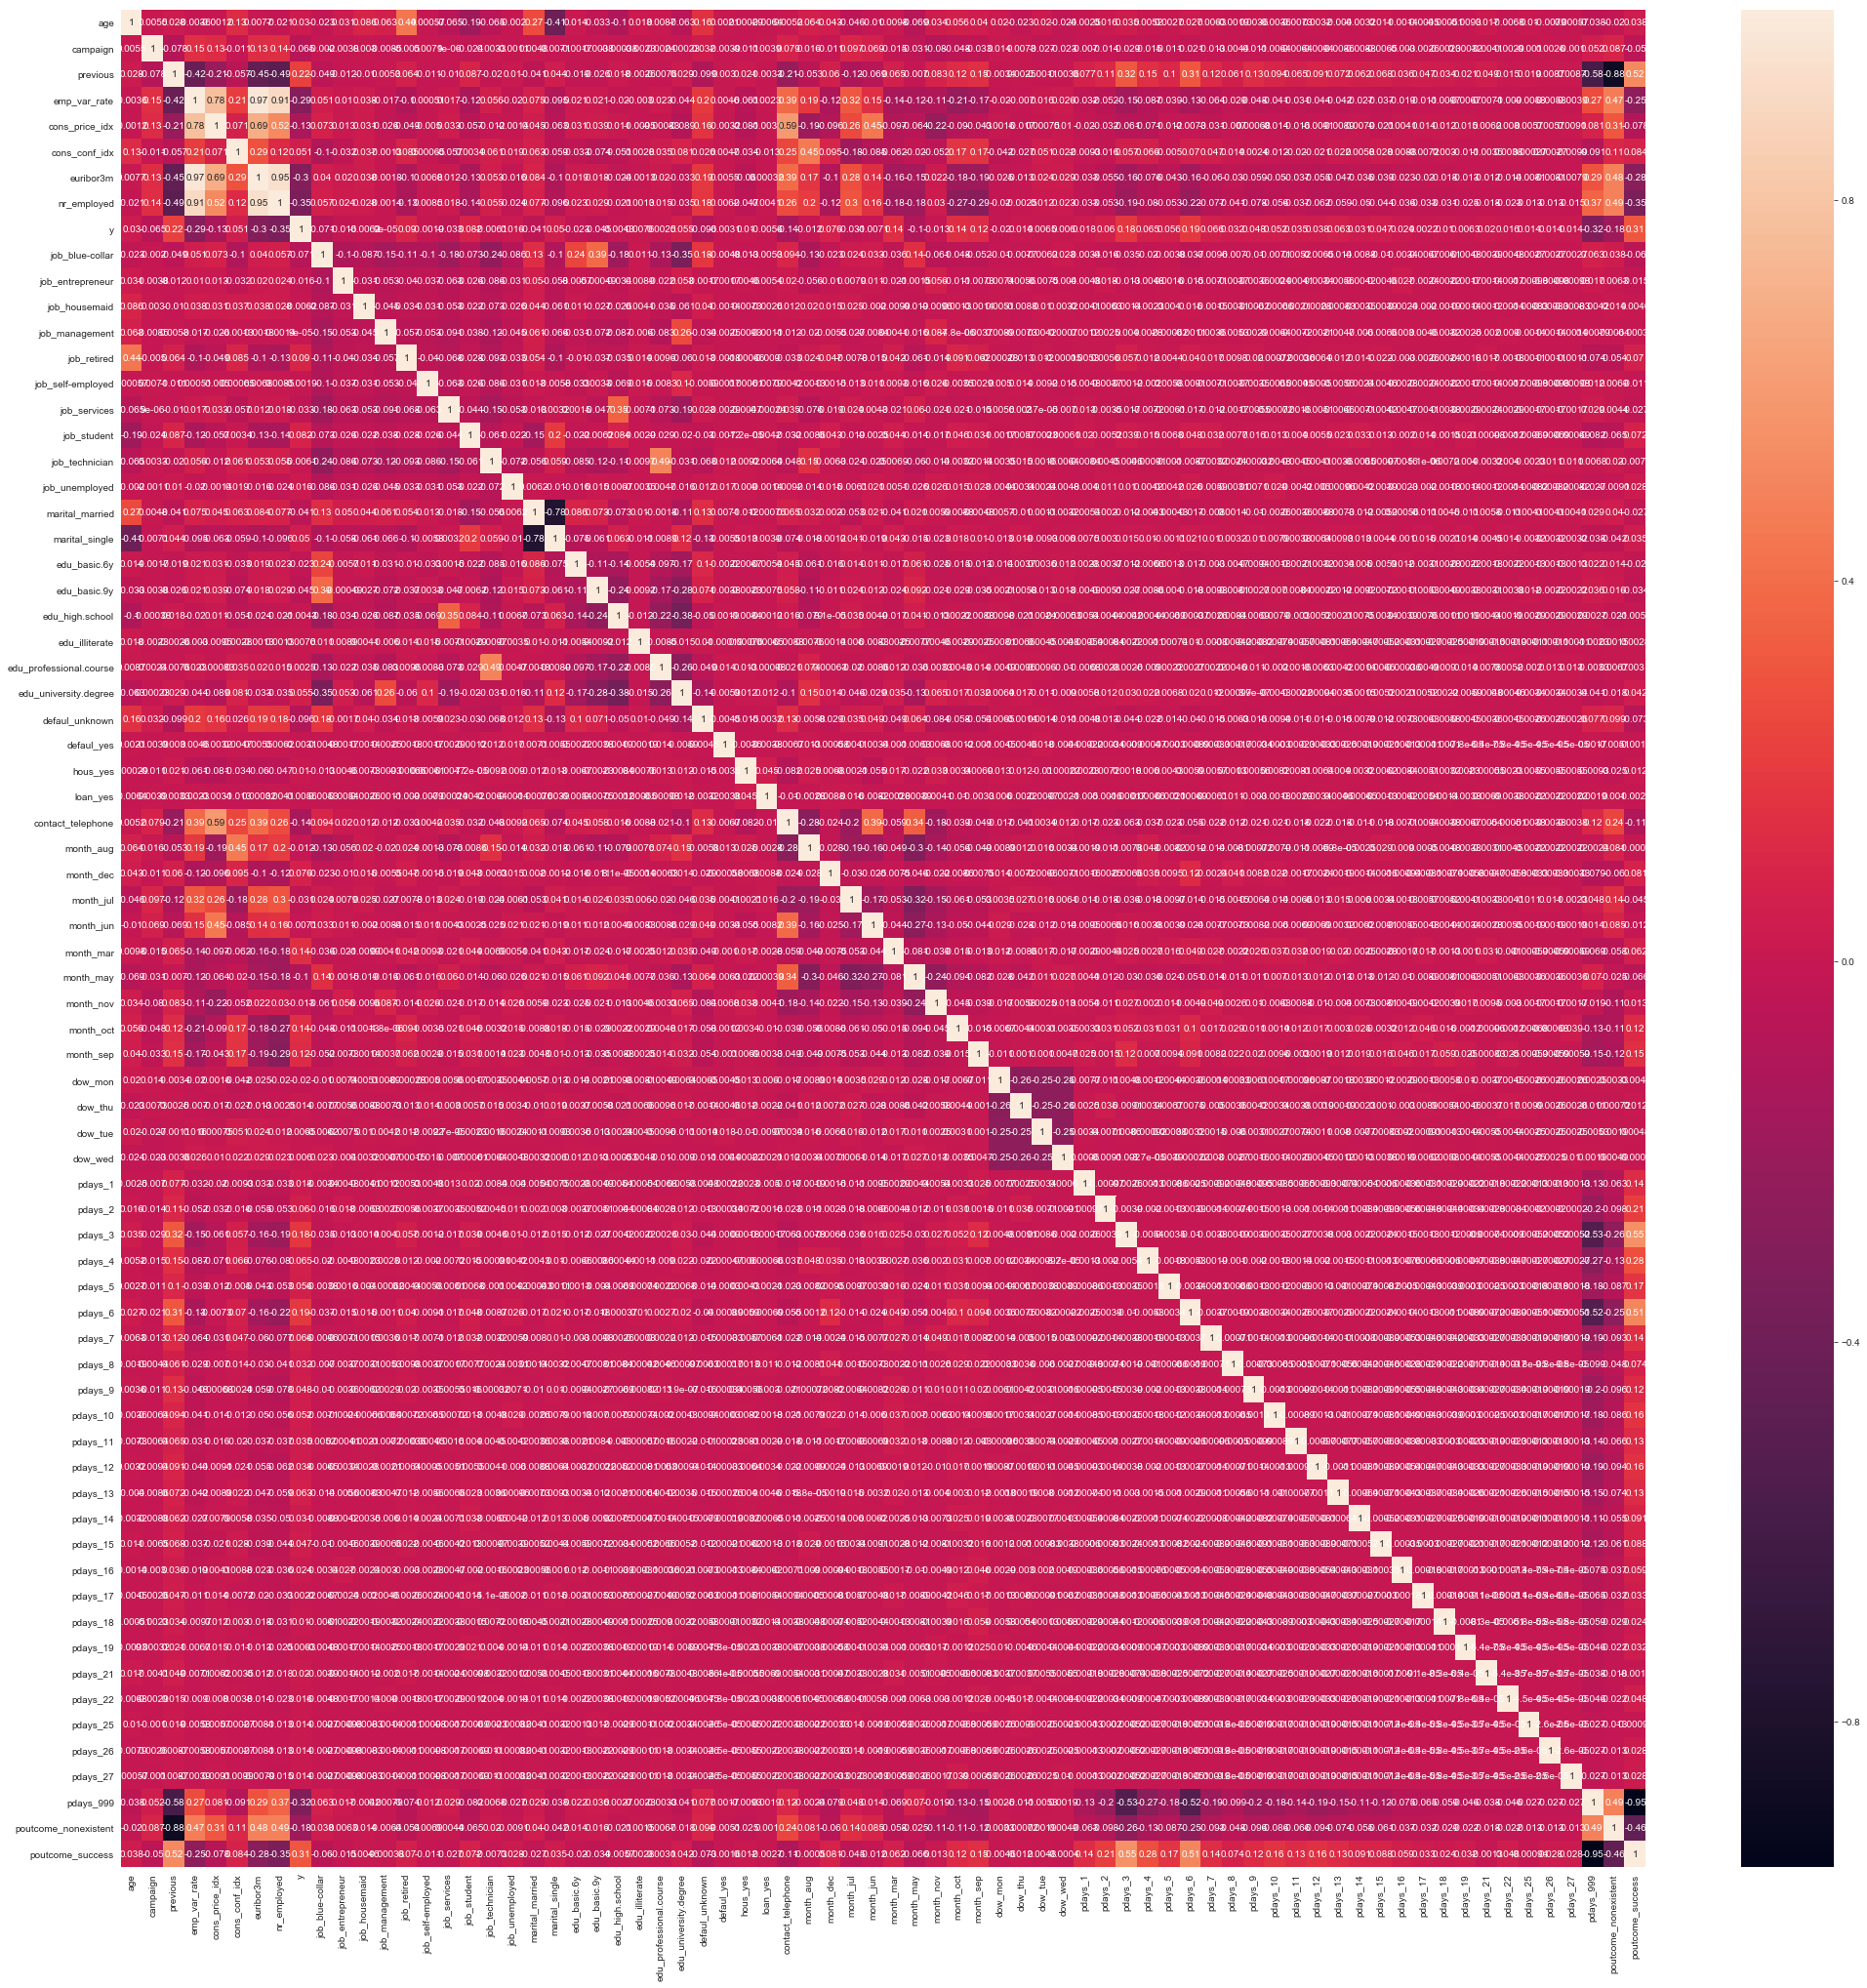

In [109]:
rcParams['figure.figsize'] = 35, 35
sns.set_style('whitegrid')
sns.heatmap(dfdum.corr(), annot = True) 

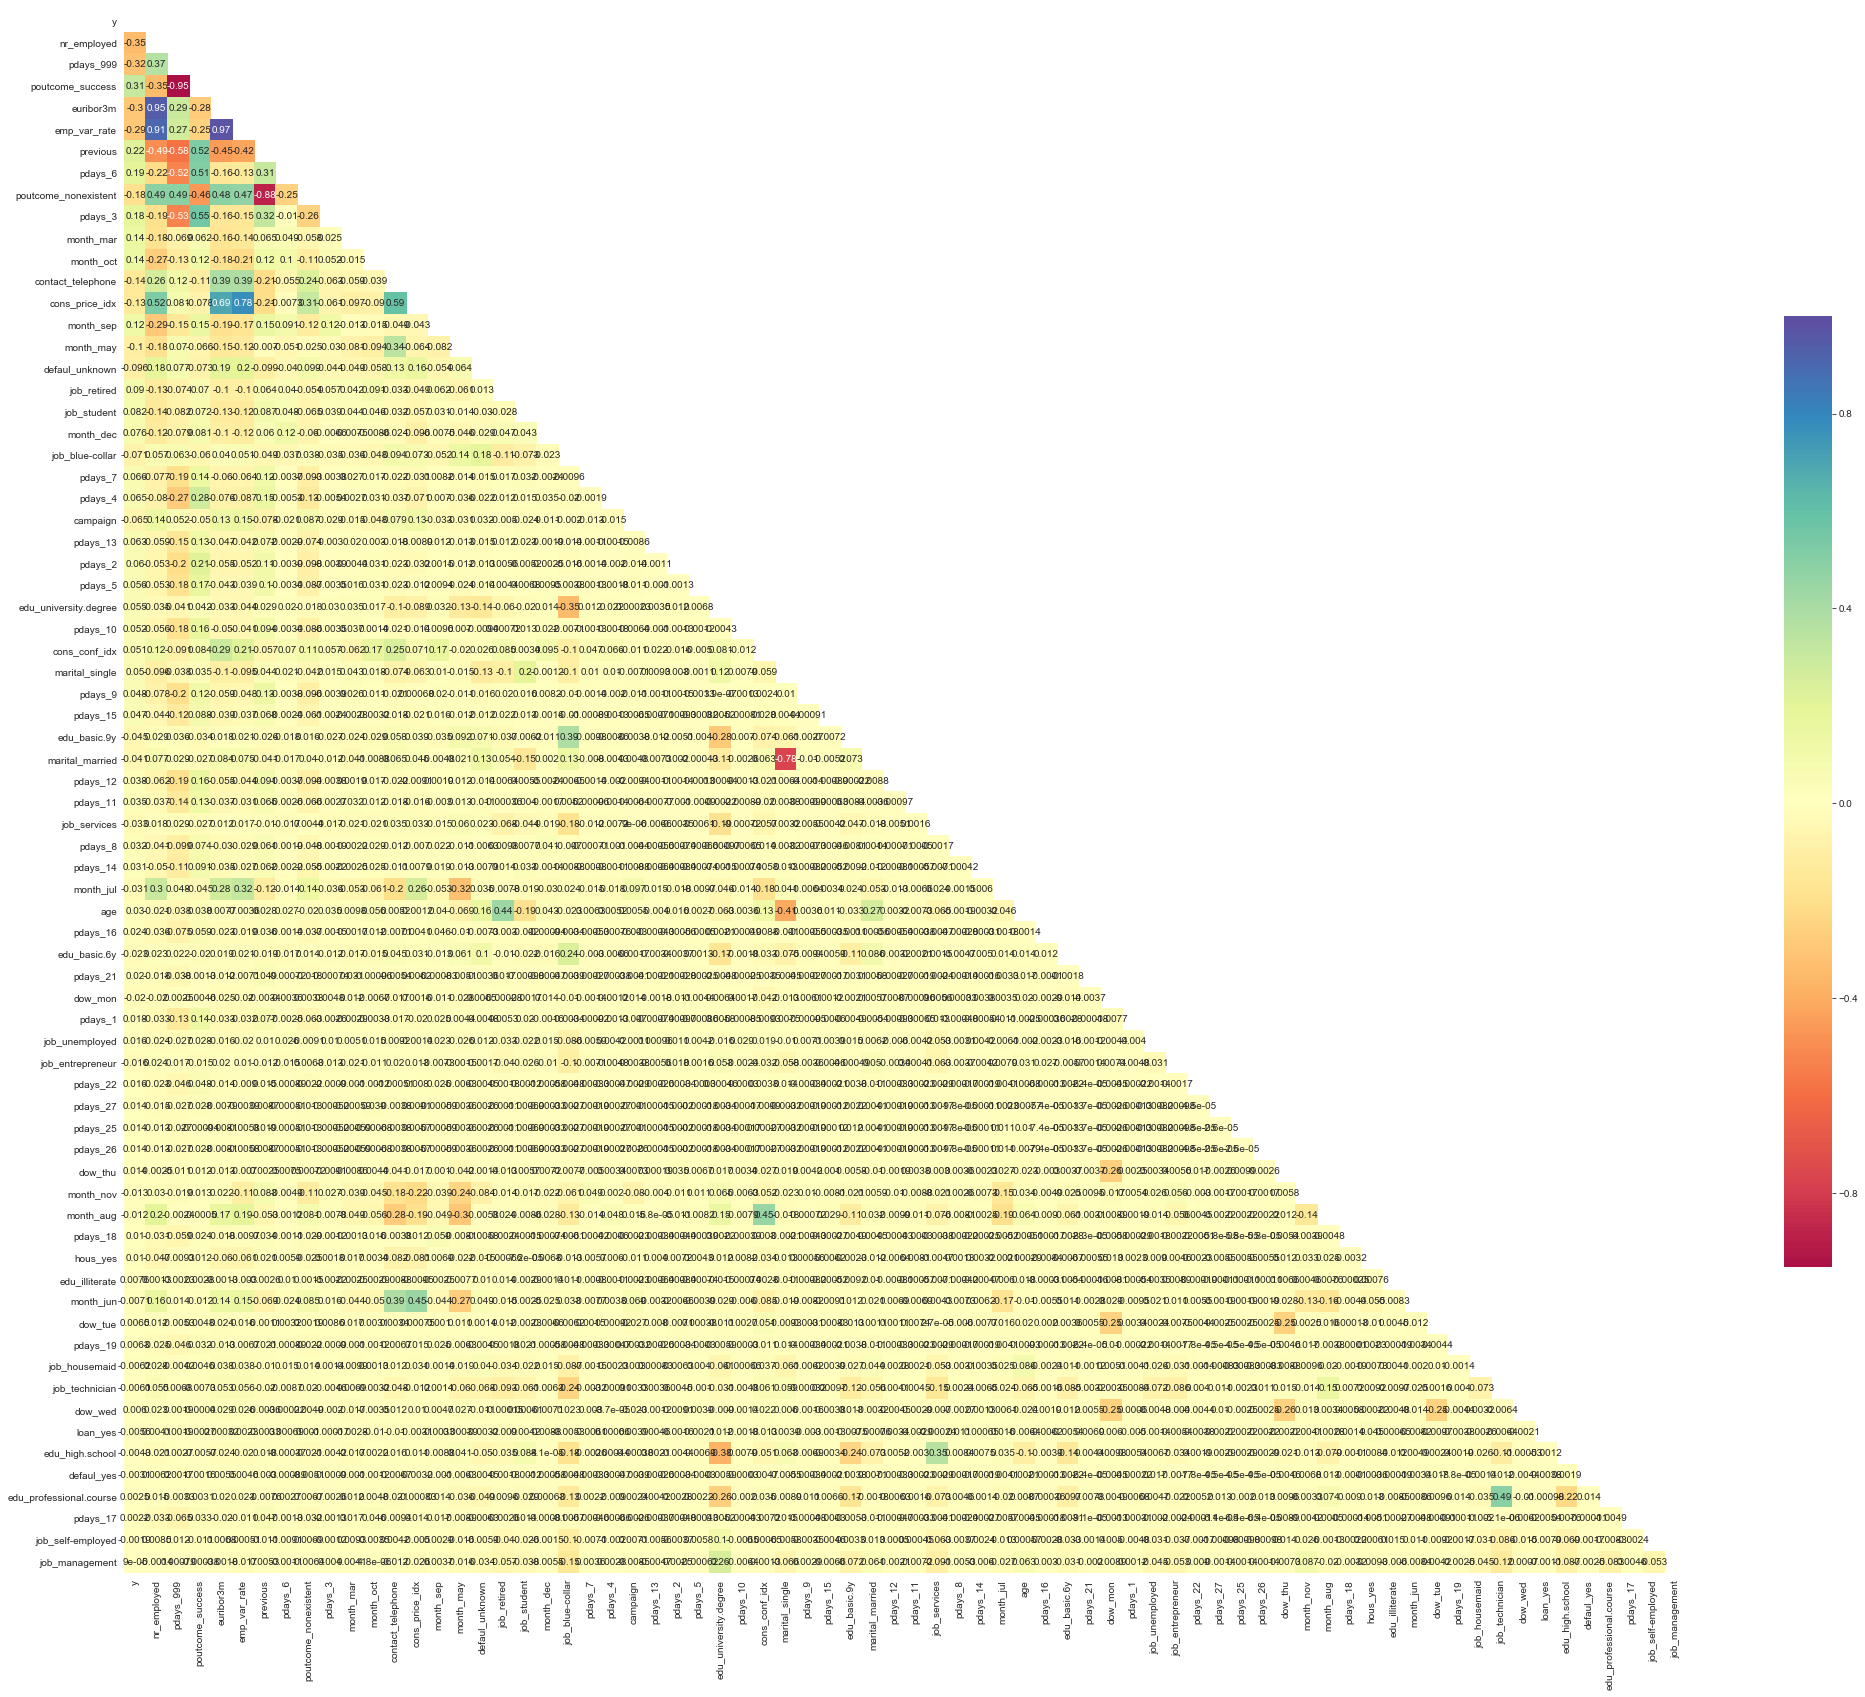

In [111]:
k=100
corr = dfdum.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

cols = corr.apply(abs).nlargest(k, "y")["y"].index



cm = np.corrcoef(dfdum[cols].values.T)
ax = plt.subplots(figsize = (35,35))
sns.heatmap(data = cm, mask = mask, center = 0, cmap = "Spectral"
            , annot = True, square = True, cbar_kws={"shrink": .5}, yticklabels = cols.values, xticklabels = cols.values);

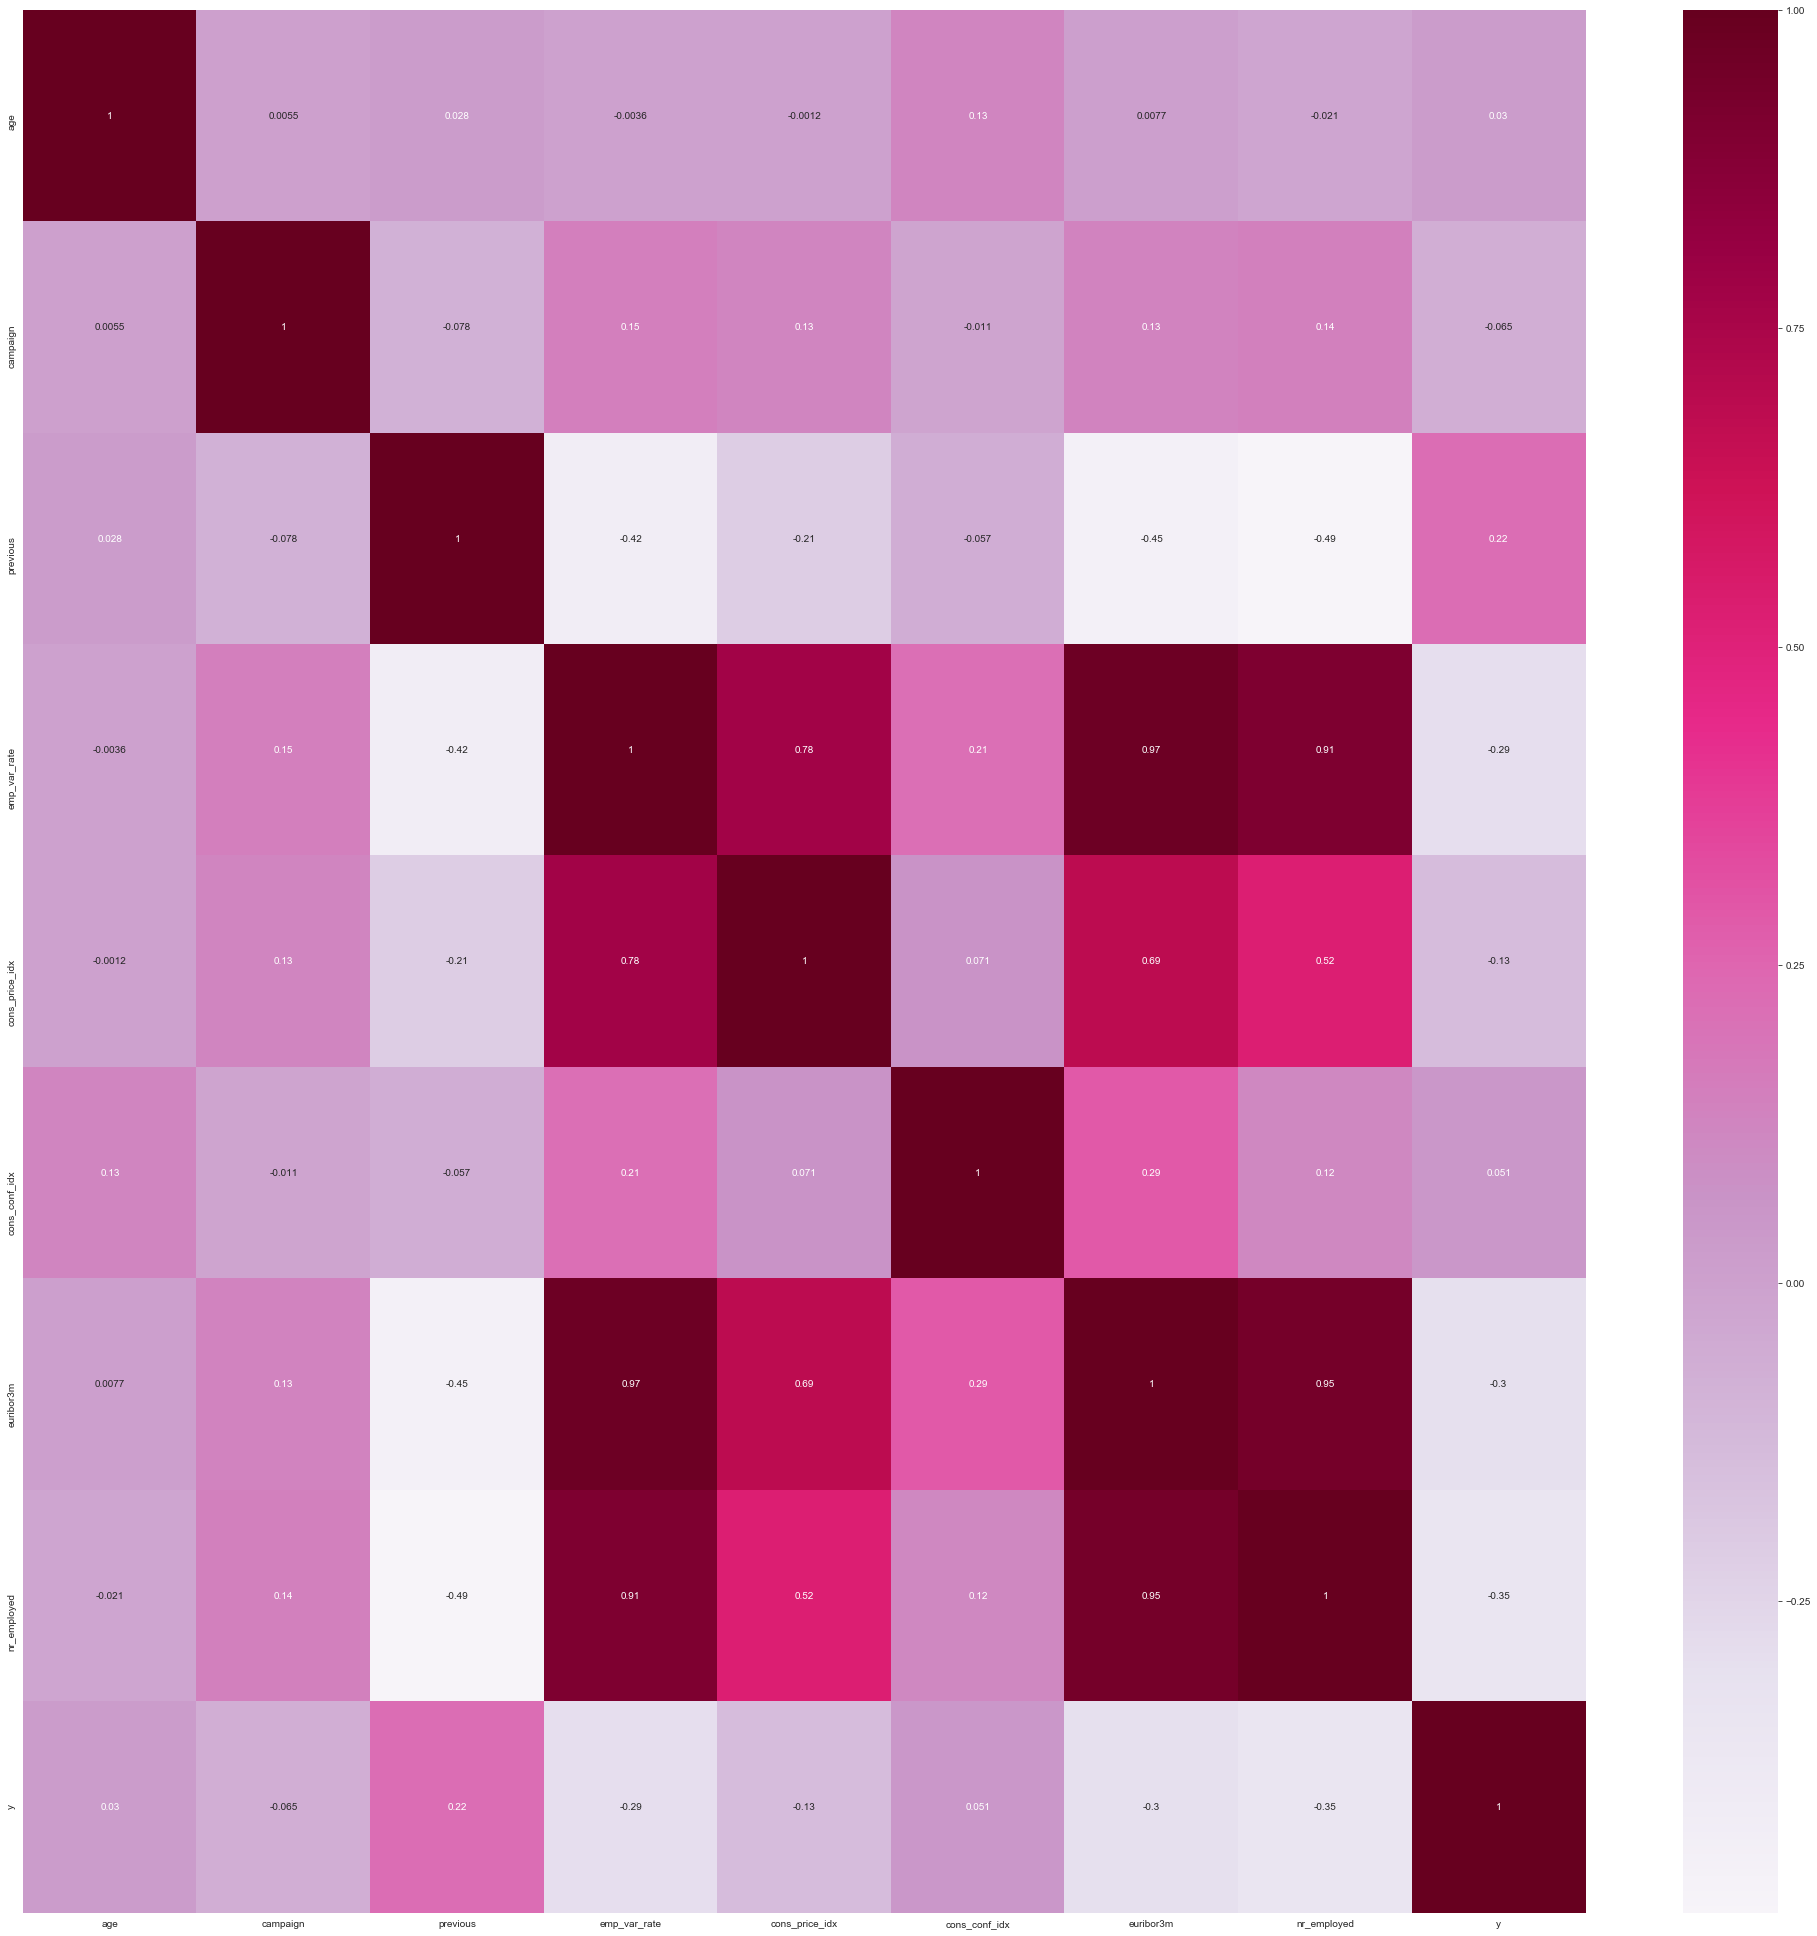

In [120]:
rcParams['figure.figsize'] = 35, 35
sns.set_style('whitegrid')
sns.heatmap(df2.corr(), annot = True, cmap="PuRd") 

In [298]:
dfnew = df2.drop(columns = ["campaign","cons_price_idx","cons_conf_idx","euribor3m","emp_var_rate"])

In [299]:
dfnew.head()

,age,previous,nr_employed,y
0,44,0,5228.1,0
1,28,2,4991.6,1
2,39,0,5099.1,0
3,55,1,5076.2,1
4,30,0,5228.1,0


In [300]:
df_dmy = pd.concat([dfnew,pdays,poutcome,month,contact],axis=1)
df_dmy.head()

,age,previous,nr_employed,y,pdays_1,pdays_2,pdays_3,pdays_4,pdays_5,pdays_6,pdays_7,pdays_8,pdays_9,pdays_10,pdays_11,pdays_12,pdays_13,pdays_14,pdays_15,pdays_16,pdays_17,pdays_18,pdays_19,pdays_21,pdays_22,pdays_25,pdays_26,pdays_27,pdays_999,poutcome_nonexistent,poutcome_success,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_telephone
0,44,0,5228.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
1,28,2,4991.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,39,0,5099.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,55,1,5076.2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,30,0,5228.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0


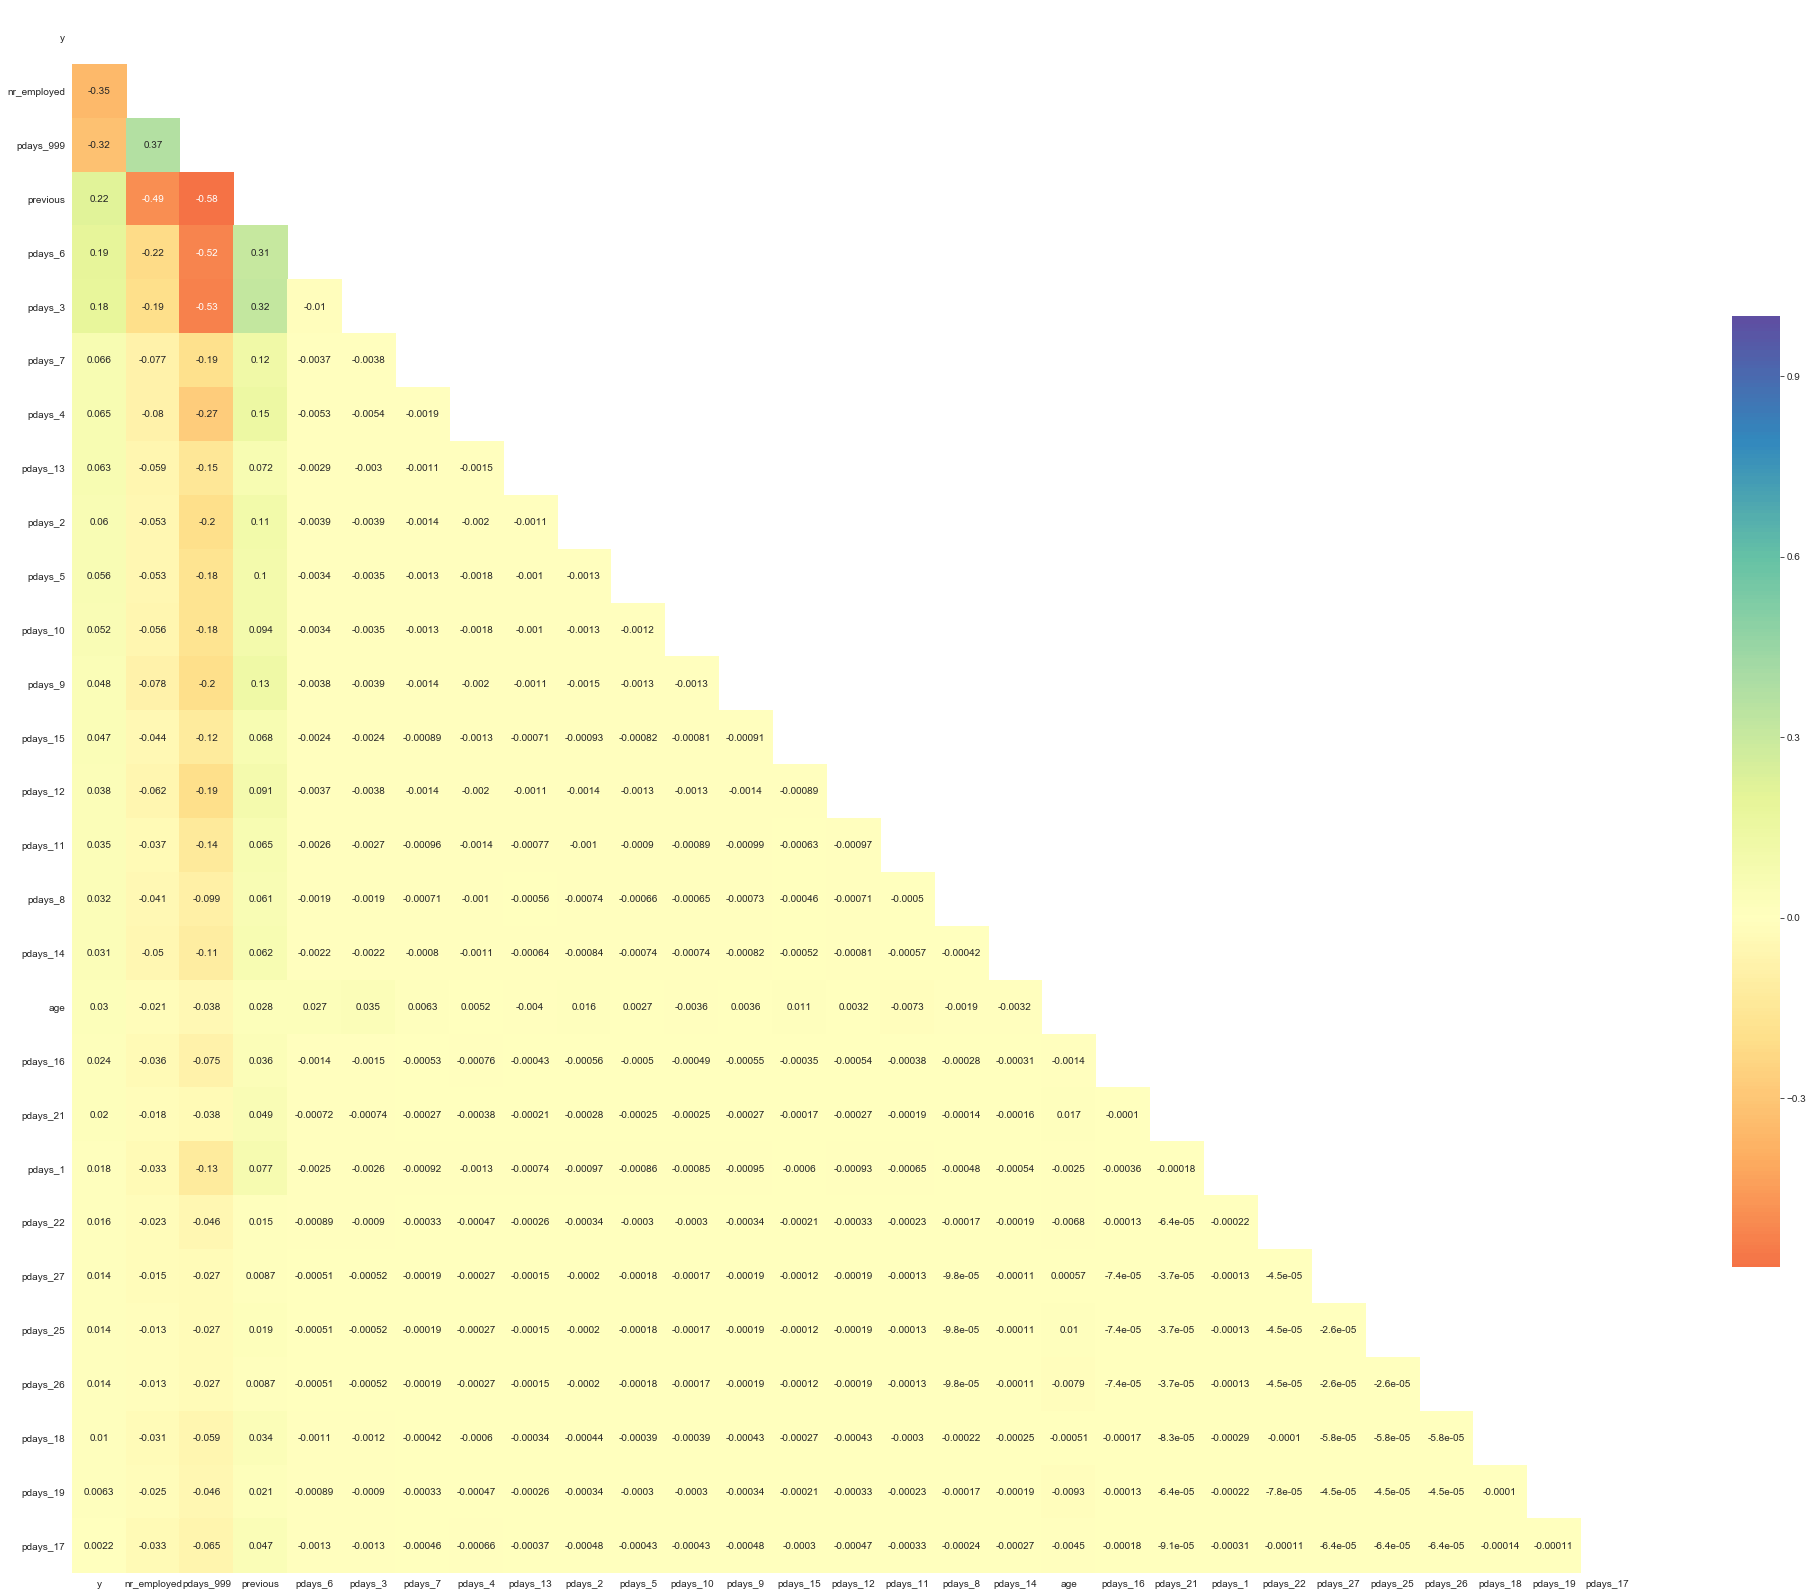

In [179]:
k=100
corr = df_dmy.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

cols = corr.apply(abs).nlargest(k, "y")["y"].index



cm = np.corrcoef(df_dmy[cols].values.T)
ax = plt.subplots(figsize = (35,35))
sns.heatmap(data = cm, mask = mask, center = 0, cmap = "Spectral"
            , annot = True, square = True, cbar_kws={"shrink": .5}, yticklabels = cols.values, xticklabels = cols.values);

## Logistic regression

In [301]:
df_X = df_dmy.drop(columns = "y")

In [302]:
X = df_X.iloc[:,0:42].values
y = df_dmy.y.values

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=30)

In [304]:
Log = LogisticRegression()
Log.fit(X_train, y_train)

//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [305]:
y_pred = Log.predict(X_test)

In [306]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[6744,   59],
       [ 726,  120]])

In [307]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      6803
           1       0.67      0.14      0.23       846

    accuracy                           0.90      7649
   macro avg       0.79      0.57      0.59      7649
weighted avg       0.88      0.90      0.87      7649



In [308]:
df_dmy.shape

(38245, 41)

In [163]:
#scores = cross_val_score(Log, X_test, y_test, cv=6)
#print ("Cross-validated scores:", scores)

In [310]:
predicted = cross_val_predict(Log, X, y, cv=3)

//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [171]:
#score = f1_score(y_test,y111)

In [311]:
print(classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     33987
           1       0.67      0.10      0.18      4258

    accuracy                           0.89     38245
   macro avg       0.79      0.55      0.56     38245
weighted avg       0.87      0.89      0.86     38245



## scale

In [340]:
dfy = df2.drop(columns = "y")
std_scale = preprocessing.StandardScaler().fit(dfy)
df_train_test = std_scale.transform(dfy)
df_scale = pd.DataFrame(df_train_test)
df_scale.columns = dfy.columns
df_scale.head()

,age,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,0.402273,-0.566106,-0.348978,0.841126,-0.219157,0.960638,0.774303,0.845428
1,-1.152732,0.156584,3.756424,-1.138536,0.840946,0.160316,-1.672808,-2.450307
2,-0.083666,-0.204761,-0.348978,-1.202396,-0.859383,-1.418697,-1.282103,-0.952246
3,1.471339,-0.566106,1.703723,-1.904856,-2.375799,1.977263,-1.591893,-1.271368
4,-0.958357,1.963310,-0.348978,0.841126,0.603247,-0.466963,0.773147,0.845428


In [341]:
dfbla = df_scale[["previous","nr_employed"]]

In [351]:
#df3 = pd.concat([dfbla, pdays, poutcome,month,contact], axis=1)

In [364]:
df3 = pd.concat([df_scale,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,poutcome],axis=1)


In [365]:
df_X = df3
df_X.shape

(38245, 71)

In [366]:
X = df_X.iloc[:,0:72].values
y = df2.y.values

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state=42)

In [368]:
Log = LogisticRegression()
Log.fit(X_train, y_train)

//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [369]:
y_pred = Log.predict(X_test)

In [370]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[13392,   207],
       [ 1306,   393]])

In [371]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     13599
           1       0.66      0.23      0.34      1699

    accuracy                           0.90     15298
   macro avg       0.78      0.61      0.64     15298
weighted avg       0.88      0.90      0.88     15298



In [390]:
THRESHOLD = 0.2
preds = np.where(Log.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds), f1_score(y_test,preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score", "f1score"])

,0
accuracy,0.870179
recall,0.557975
precision,0.434265
roc_auc_score,0.733580
f1score,0.488408


In [381]:
recall_score(y_test, y_pred)

0.23131253678634492